In [371]:
from utils import *

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(formatter={'float': '{: 0.6f}'.format})

In [372]:
def y(x, m, b):
    return m*x + b

(100, 1) (50, 1)
(150, 2)


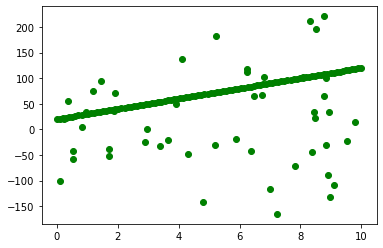

In [373]:
# Input data

num = 100
noise = 50
n = num + noise

X = np.linspace(0, 10, num).reshape((num,1))
Y = [y(x, 10, 20) for x in X]
# + np.random.uniform(5,20) 
X_noise = np.random.uniform(0, 10 , noise).reshape((noise, 1))
Y_noise = [y(x, np.random.randint(-20,20), np.random.randint(-100,100)) for x in X_noise]

print(X.shape, X_noise.shape)

X = np.concatenate((X, X_noise), axis=0)
Y = np.concatenate((Y, Y_noise), axis=0)

X = np.concatenate((X, np.ones((n,1))), axis=1)
print(X.shape)
plt.scatter(X[:,0], Y, c='g')

In [374]:
# points = np.array([
#     [0,0],
#     [1,1],
#     [2,2],
#     [3,2],
#     [3,3],
#     [4,4],
#     [10,2]
# ])
# n = points.shape[0]

# Y = np.zeros(n); X = np.ones((n,2))

# for i in range(n):
#     Y[i] = points[i,1]; X[i] = np.array([points[i,0], 1])

In [375]:
# GNC initiation
# Initial line guess
m0 = 1
b0 = 1
B0 = np.array([m0, b0])

r = np.zeros(n)
for i in range(n):
    r[i] = np.linalg.norm(Y[i] - X[i] @ B0)
r0_max = np.max(r)

max_iter = 1000
eps = 0.2
mu_update = 1.4
w = np.ones(n, dtype=np.float32)
mu = eps**2 / (2*r0_max**2 - eps**2)

# w = np.array([1,1,1,1,1,1,0], dtype=np.float32)

In [376]:
# GNC iteration
last_iter = []
B_iter = []
iterations = 0

for i in range(max_iter):
    iterations += 1
    last_iter.append(np.sum(w))

    # print("\nWeights:\t",w)
    # print("Loss:\t\t",r)

    W = np.diag(w)
    X_iter = W @ X
    Y_iter = W @ Y
    B = np.linalg.inv(X_iter.T @ X_iter) @ X_iter.T @ Y_iter

    B_iter.append(B)

    for j in range(n):
        r[j] = np.linalg.norm(Y[j] - X[j] @ B)
        w[j] = w_from_r(r[j], eps, mu)

    mu = mu_update * mu

    if i >= 5:
        if np.sum(w) == last_iter[i]:
            last_iter.append(np.sum(w))
            break
print(last_iter)
print(iterations)

[150.0, 0.0019293262, 0.0032443004, 0.0070334305, 0.12422077, 1.0592351, 1.1034244, 1.9962032, 87.785225, 100.00174, 100.00203, 100.002365, 100.00275, 100.00319, 100.00369, 100.00427, 100.004944, 100.00569, 100.00656, 100.00753, 100.00862, 100.00979, 100.011086, 100.01246, 100.01395, 100.01539, 100.01673, 100.01805, 100.01893, 100.01956, 100.02019, 100.020584, 100.02157, 100.022354, 100.02205, 100.01997, 100.01517, 100.00623, 100.0, 100.0]
39


100 50


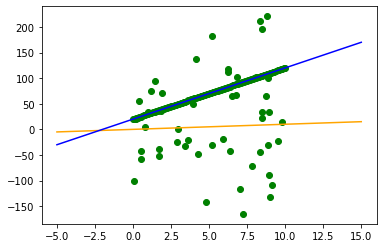

In [377]:
fig, ax = plt.subplots()
# ax.set_xlim([-0.5,10.5]);ax.set_ylim([-0.4,5])
x = np.linspace(-5, 15, 1000)
ax.plot(x, x, color='orange')
ax.plot(x, B[0]*x + B[1], color='blue')
# ax.scatter(points[:,0], points[:,1], color='green')
ax.scatter(X[:,0], Y, c='g')
print(num, noise)